# Der Aufstieg von NVIDIA: Analyse gesellschaftlicher und technologischer Trends

## Einleitung
Die Analyse untersucht die Entwicklung des Suchvolumens für NVIDIA Aktie und verwandte Begriffe von November 2023 bis November 2024 in Deutschland. Ziel ist es, gesellschaftliche und technologische Trends zu identifizieren, die den rasanten Aufstieg von NVIDIA unterstützen. Die Daten umfassen regionale Unterschiede, zeitliche Peaks und Verbindungen zu wichtigen Ereignissen wie Quartalszahlen, technologischen Innovationen und Marktbewegungen.


## Analyse des Interesses an der NVIDIA Aktie im Jahr 2024

In [44]:
import pandas as pd
# Funktion für Laden und Vorverarbeiten Geo Daten
def load_and_prepare_geo_data(filepath):
    # Einlesen der Datei mit Anpassung der ersten Zeile und dem richtigen Trennzeichen
    df_geo = pd.read_csv(filepath, sep=',', skiprows=1)
    
    # Spaltennamen anpassen
    df_geo.columns = ['Region', 'Search Volume']
    
    # Konvertiere 'Search Volume' in einen numerischen Datentyp
    df_geo['Search Volume'] = pd.to_numeric(df_geo['Search Volume'], errors='coerce')
    
    return df_geo

#Funktion Laden und Vorverarbeiten Zeitreihen Daten

def load_and_prepare_timeline_data(filepath):
    # Einlesen der Datei mit Anpassung der ersten Zeile und dem richtigen Trennzeichen
    df_timeline = pd.read_csv(filepath, sep=',', skiprows=1)
    
    # Spaltennamen anpassen
    df_timeline.columns = ['Week', 'Search Volume']
    
    # Konvertiere die 'Week'-Spalte in ein Datetime-Format
    df_timeline['Week'] = pd.to_datetime(df_timeline['Week'], errors='coerce')
    
    # Setze die 'Week'-Spalte als Index
    df_timeline.set_index('Week', inplace=True)
    
    return df_timeline


import matplotlib.pyplot as plt
#Funktion zur Visualisierung der Zeitreihen Daten

def plot_time_series(df, title='Zeitliche Entwicklung des Suchvolumens', label='Suchvolumen'):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Search Volume'], label=label)
    plt.xlabel('Datum')
    plt.ylabel('Suchvolumen')
    plt.title(title)
    plt.legend()
    plt.show()

# Funktion zur Visualisierung des gleitenden Durchschnitt
def plot_rolling_average(df, window=4, title='Suchvolumen mit gleitendem Durchschnitt', label='Wöchentliches Suchvolumen'):
    # Berechne den gleitenden Durchschnitt
    df['Rolling Average'] = df['Search Volume'].rolling(window=window).mean()
    
    # Visualisiere das Suchvolumen und den gleitenden Durchschnitt
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Search Volume'], label=label)
    plt.plot(df.index, df['Rolling Average'], label=f'{window}-Wochen Durchschnitt', linestyle='--')
    plt.xlabel('Datum')
    plt.ylabel('Suchvolumen')
    plt.title(title)
    plt.legend()
    plt.show()


# Funtion zur Visualisierung Geo Daten
def plot_top_regions(df, title='Regionen mit höchstem Suchvolumen', xlabel='Region', ylabel='Suchvolumen'):
    top_regions = df.sort_values(by='Search Volume', ascending=False)
    
    plt.figure(figsize=(12, 8))
    plt.bar(top_regions['Region'], top_regions['Search Volume'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

In [45]:
df_geo_NVIDIA = load_and_prepare_geo_data('geoMap.csv')
df_timeline_NVIDIA = load_and_prepare_timeline_data('multiTimeline.csv')

df_geo_NV_aktie = load_and_prepare_geo_data('geoMap_NV_aktie.csv')
df_timeline_NV_aktie = load_and_prepare_timeline_data('multiTimeline_NV_aktie.csv')

df_geo_NV_gtc = load_and_prepare_geo_data('geoMap_NV_gtc.csv')
df_timeline_NV_gtc = load_and_prepare_timeline_data('multiTimeline_NV_gtc.csv')

df_geo_quart_zahl = load_and_prepare_geo_data('geoMap_quart_zahl.csv')
df_timeline_quart_zahl = load_and_prepare_timeline_data('multiTimeline_quart_zahl.csv')

df_geo_NV_computex = load_and_prepare_geo_data('geoMap_computex.csv')
df_timeline_NV_computex = load_and_prepare_timeline_data('multiTimeline_computex.csv')

df_geo_je_hu = load_and_prepare_geo_data('geoMap_je_hu.csv')
df_timeline_je_hu = load_and_prepare_timeline_data('multiTimeline_je_hu.csv')

df_geo_KI = load_and_prepare_geo_data('geoMap_KI.csv')
df_timeline_KI = load_and_prepare_timeline_data('multiTimeline_KI.csv')

df_geo_bitc = load_and_prepare_geo_data('geoMap_bitc.csv')
df_timeline_bitc = load_and_prepare_timeline_data('multiTimeline_bitc.csv')

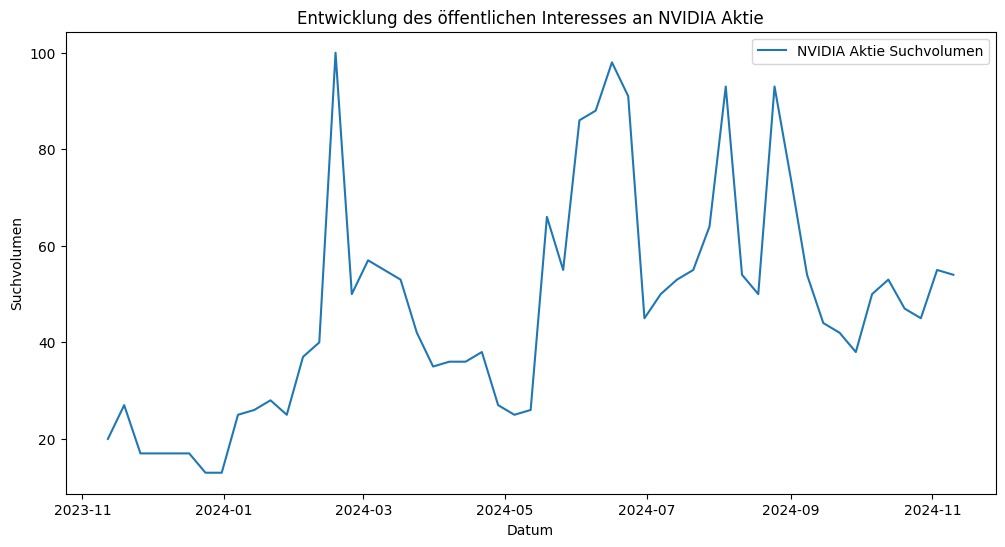

In [46]:
plot_time_series(df_timeline_NV_aktie, title="Entwicklung des öffentlichen Interesses an NVIDIA Aktie", label="NVIDIA Aktie Suchvolumen")

# Analyse des Interesses an der NVIDIA Aktie im Jahr 2024

Das öffentliche Interesse an der NVIDIA Aktie zeigte im Jahr 2024 deutliche Schwankungen. Diese Analyse untersucht die Höhepunkte und Tiefpunkte im Suchverhalten und beleuchtet mögliche Ursachen, die diese Entwicklungen beeinflusst haben.


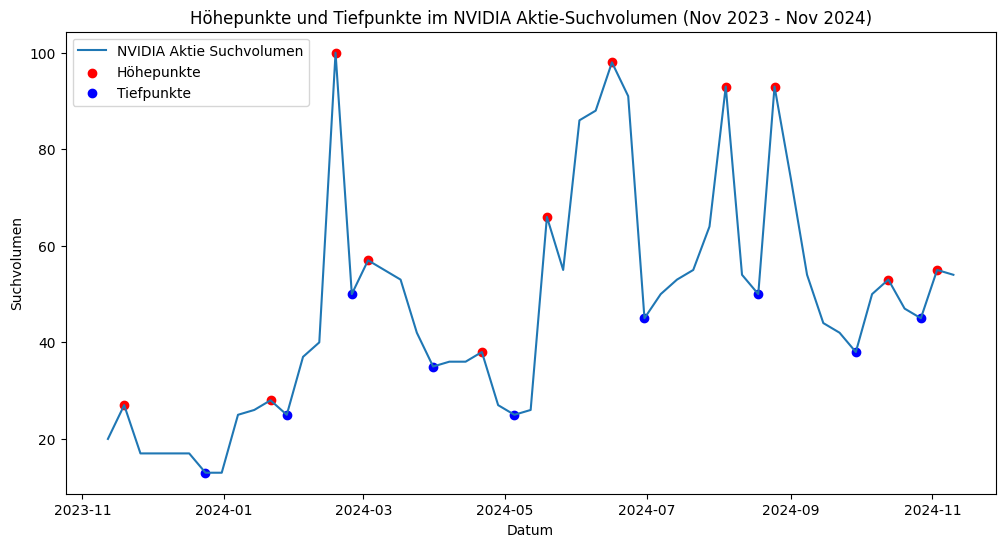

In [47]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Identifiziere Peaks
peaks, _ = find_peaks(df_timeline_NV_aktie['Search Volume'], height=10)  # Höhe kann angepasst werden
peak_dates = df_timeline_NV_aktie.index[peaks]

# Identifiziere Tiefpunkte
inverted_values = -df_timeline_NV_aktie['Search Volume'].values
troughs, _ = find_peaks(inverted_values, height=-50)  # Schwelle für Tiefpunkte kann angepasst werden
trough_dates = df_timeline_NV_aktie.index[troughs]

# Ergebnisse anzeigen
#print("Höhepunkte:", peak_dates)
#print("Tiefpunkte:", trough_dates)

# Visualisierung
plt.figure(figsize=(12, 6))
plt.plot(df_timeline_NVIDIA.index, df_timeline_NV_aktie['Search Volume'], label="NVIDIA Aktie Suchvolumen")
plt.scatter(peak_dates, df_timeline_NV_aktie['Search Volume'].iloc[peaks], color='red', label="Höhepunkte")
plt.scatter(trough_dates, df_timeline_NV_aktie['Search Volume'].iloc[troughs], color='blue', label="Tiefpunkte")
plt.title("Höhepunkte und Tiefpunkte im NVIDIA Aktie-Suchvolumen (Nov 2023 - Nov 2024)")
plt.xlabel("Datum")
plt.ylabel("Suchvolumen")
plt.legend()
plt.show()


## 2. Zeitliche Analyse der Höhepunkte

### 2.1 Höhepunkte im Februar 2024
Am 18. Februar 2024 erreichte das Suchvolumen für NVIDIA einen Höhepunkt, der stark mit den Spekulationen über die bevorstehende Veröffentlichung der Quartalszahlen am 21. Februar 2024 korreliert. Der Peak spiegelt das gesteigerte öffentliche Interesse und die Aufmerksamkeit wider, die NVIDIA vor der Bekanntgabe beeindruckender finanzieller Ergebnisse erfuhr. Interessanterweise zeigt die Analyse, dass der 21. Februar selbst keinen weiteren Peak darstellt, was darauf hindeutet, dass die spekulative Phase vor der Veröffentlichung die Haupttreiber für das erhöhte Suchvolumen war.



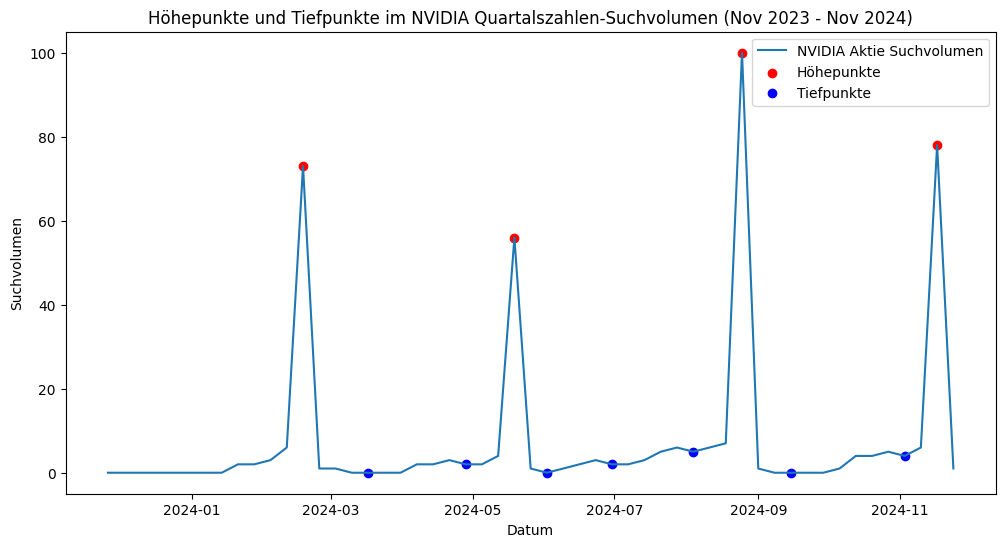

In [48]:
# Identifiziere Peaks
df_timeline_quart_zahl['Search Volume'] = pd.to_numeric(df_timeline_quart_zahl['Search Volume'], errors='coerce')
peaks, _ = find_peaks(df_timeline_quart_zahl['Search Volume'], height=10)  # Höhe kann angepasst werden
peak_dates = df_timeline_quart_zahl.index[peaks]

# Identifiziere Tiefpunkte
inverted_values = -df_timeline_quart_zahl['Search Volume'].values
troughs, _ = find_peaks(inverted_values, height=-50)  # Schwelle für Tiefpunkte kann angepasst werden
trough_dates = df_timeline_quart_zahl.index[troughs]

# Ergebnisse anzeigen
#print("Höhepunkte:", peak_dates)
#print("Tiefpunkte:", trough_dates)

# Visualisierung
plt.figure(figsize=(12, 6))
plt.plot(df_timeline_quart_zahl.index, df_timeline_quart_zahl['Search Volume'], label="NVIDIA Aktie Suchvolumen")
plt.scatter(peak_dates, df_timeline_quart_zahl['Search Volume'].iloc[peaks], color='red', label="Höhepunkte")
plt.scatter(trough_dates, df_timeline_quart_zahl['Search Volume'].iloc[troughs], color='blue', label="Tiefpunkte")
plt.title("Höhepunkte und Tiefpunkte im NVIDIA Quartalszahlen-Suchvolumen (Nov 2023 - Nov 2024)")
plt.xlabel("Datum")
plt.ylabel("Suchvolumen")
plt.legend()
plt.show()

### Korrelation der Höhepunkte: NVIDIA Aktie und NVIDIA Quartalszahlen

Die Analyse zeigt eine deutliche Korrelation zwischen den Höhepunkten des Suchvolumens für die Begriffe "NVIDIA Aktie" und "NVIDIA Quartalszahlen". Insbesondere folgende Daten weisen auf eine starke Verbindung hin:

- **19. Mai 2024:**  
  - Beide Begriffe verzeichnen erneut einen Peak, der mit der Veröffentlichung der Quartalszahlen für das erste Quartal 2024 zusammenfällt. Die Zahlen zeigten beeindruckende Umsatz- und Gewinnsteigerungen, was zu einer erhöhten Aufmerksamkeit in der Öffentlichkeit führte.

- **25. August 2024:**  
  - Ein weiterer gemeinsamer Höhepunkt ist mit der Veröffentlichung der Quartalszahlen für das zweite Quartal 2024 verbunden. NVIDIA überzeugte erneut mit starken finanziellen Ergebnissen, was das Interesse an der Aktie und den Quartalszahlen gleichermaßen steigerte.

- **3. November 2024:**  
  - Während "NVIDIA Quartalszahlen" an diesem Datum einen Tiefpunkt erreicht, zeigen die Begriffe "NVIDIA" und "NVIDIA Aktie" einen Höhepunkt. Dies deutet darauf hin, dass die Suchanfragen zu den Quartalszahlen bereits im Vorfeld zurückgingen, während allgemeines Interesse an der Aktie durch andere Faktoren getrieben wurde.

Diese Übereinstimmungen verdeutlichen, wie stark NVIDIA’s finanzielle Berichte das Suchverhalten und das öffentliche Interesse beeinflussen. Die Quartalszahlen fungieren als zentrale Treiber für die Wahrnehmung des Unternehmens und der Aktie.


### Weitere Einflussfaktoren auf den NVIDIA Aktienkurs

Neben den Quartalszahlen beeinflussen auch andere Themen maßgeblich das öffentliche Interesse an NVIDIA und die Entwicklung des Aktienkurses. Dazu gehören:

- **Bitcoin und Kryptowährungen:** NVIDIA’s Rolle im Bereich des Krypto-Minings sorgt bei Marktbewegungen von Bitcoin häufig für steigendes Interesse an der Aktie und dem Unternehmen. Insbesondere Peaks wie am 4. August 2024 zeigen diesen Zusammenhang deutlich.

- **Künstliche Intelligenz (KI):** NVIDIA ist ein Vorreiter im Bereich der KI-Entwicklung. Produktankündigungen, Fortschritte bei KI-Technologien und Kooperationen mit anderen Branchenführern treiben das Interesse voran. Veranstaltungen wie die **Computex 2024** und Ankündigungen von Partnerschaften im KI-Sektor haben das Unternehmen weiter gestärkt. Besonders der Peak im Oktober 2024 könnte durch NVIDIA’s Rolle in der KI-Innovation beeinflusst worden sein.

- **Öffentliches Auftreten und große Ankündigungen:** Veranstaltungen wie die **Computex 2024** oder die **Gamescom** bieten NVIDIA eine Plattform, um technologische Innovationen vorzustellen. Keynotes und Produktankündigungen generieren dabei weltweite Aufmerksamkeit und beeinflussen sowohl das Suchverhalten als auch den Aktienkurs.

- **Politische Entwicklungen:** Politische Entscheidungen, wie die Diskussionen um Kryptowährungen in den USA oder globale Handelsabkommen, haben ebenfalls Auswirkungen auf NVIDIA’s Wahrnehmung und Position im Markt.

- **Aktiensplit:** Der Aktiensplit im Juni 2024 hat die Investitionsmöglichkeiten für Anleger erweitert und zu einem temporären Anstieg des Aktienkurses und des Suchvolumens geführt.

Die Analyse dieser Themen zeigt, dass NVIDIA nicht nur von technologischen Trends, sondern auch von wirtschaftlichen, politischen und gesellschaftlichen Entwicklungen profitiert. Diese Faktoren wirken sich sowohl auf das öffentliche Interesse als auch auf die Marktbewertung des Unternehmens aus.


### Vergleich der Verschiedenen Themen anhand der Höhepunkte

Gemeinsame Höhepunkte: set()


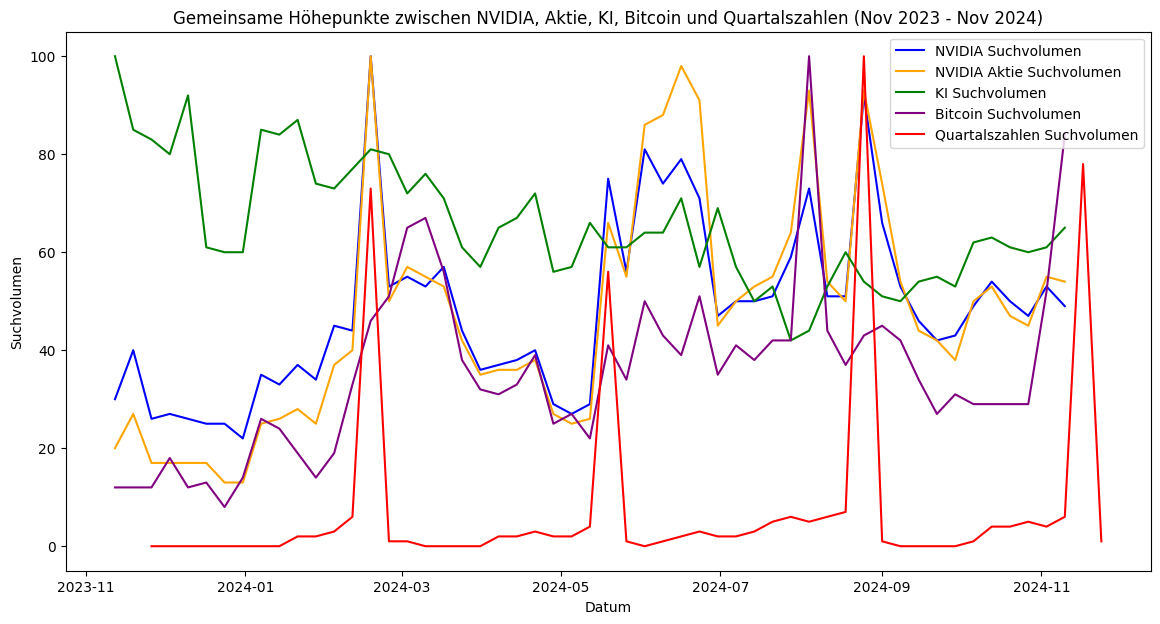

In [49]:
# Funktion zur Berechnung der Höhepunkte
def calculate_peaks(dataframe, column, threshold=50):
    peaks, _ = find_peaks(dataframe[column], height=threshold)
    return dataframe.index[peaks]

# Berechne Höhepunkte für verschiedene Suchbegriffe
nvidia_peaks = calculate_peaks(df_timeline_NVIDIA, 'Search Volume')
aktie_peaks = calculate_peaks(df_timeline_NV_aktie, 'Search Volume')
ki_peaks = calculate_peaks(df_timeline_KI, 'Search Volume')
bitcoin_peaks = calculate_peaks(df_timeline_bitc, 'Search Volume')
df_timeline_quart_zahl['Search Volume'] = pd.to_numeric(df_timeline_quart_zahl['Search Volume'], errors='coerce')
quartal_peaks = calculate_peaks(df_timeline_quart_zahl, 'Search Volume')

# Finde gemeinsame Höhepunkte
common_peaks = set(nvidia_peaks).intersection(
    set(aktie_peaks),
    set(ki_peaks),
    set(bitcoin_peaks),
    set(quartal_peaks)
)
print("Gemeinsame Höhepunkte:", common_peaks)

# Plotten der gemeinsamen Höhepunkte
plt.figure(figsize=(14, 7))

# Zeitreihen der verschiedenen Suchbegriffe
plt.plot(df_timeline_NVIDIA.index, df_timeline_NVIDIA['Search Volume'], label="NVIDIA Suchvolumen", color="blue")
plt.plot(df_timeline_NV_aktie.index, df_timeline_NV_aktie['Search Volume'], label="NVIDIA Aktie Suchvolumen", color="orange")
plt.plot(df_timeline_KI.index, df_timeline_KI['Search Volume'], label="KI Suchvolumen", color="green")
plt.plot(df_timeline_bitc.index, df_timeline_bitc['Search Volume'], label="Bitcoin Suchvolumen", color="purple")
plt.plot(df_timeline_quart_zahl.index, df_timeline_quart_zahl['Search Volume'], label="Quartalszahlen Suchvolumen", color="red")

# Markiere gemeinsame Höhepunkte
for peak in common_peaks:
    plt.axvline(x=peak, color='black', linestyle='--', label=f'Gemeinsamer Höhepunkt: {peak}' if peak == list(common_peaks)[0] else "")

# Titel und Achsenbeschriftungen
plt.title("Gemeinsame Höhepunkte zwischen NVIDIA, Aktie, KI, Bitcoin und Quartalszahlen (Nov 2023 - Nov 2024)")
plt.xlabel("Datum")
plt.ylabel("Suchvolumen")
plt.legend()
plt.show()
                 

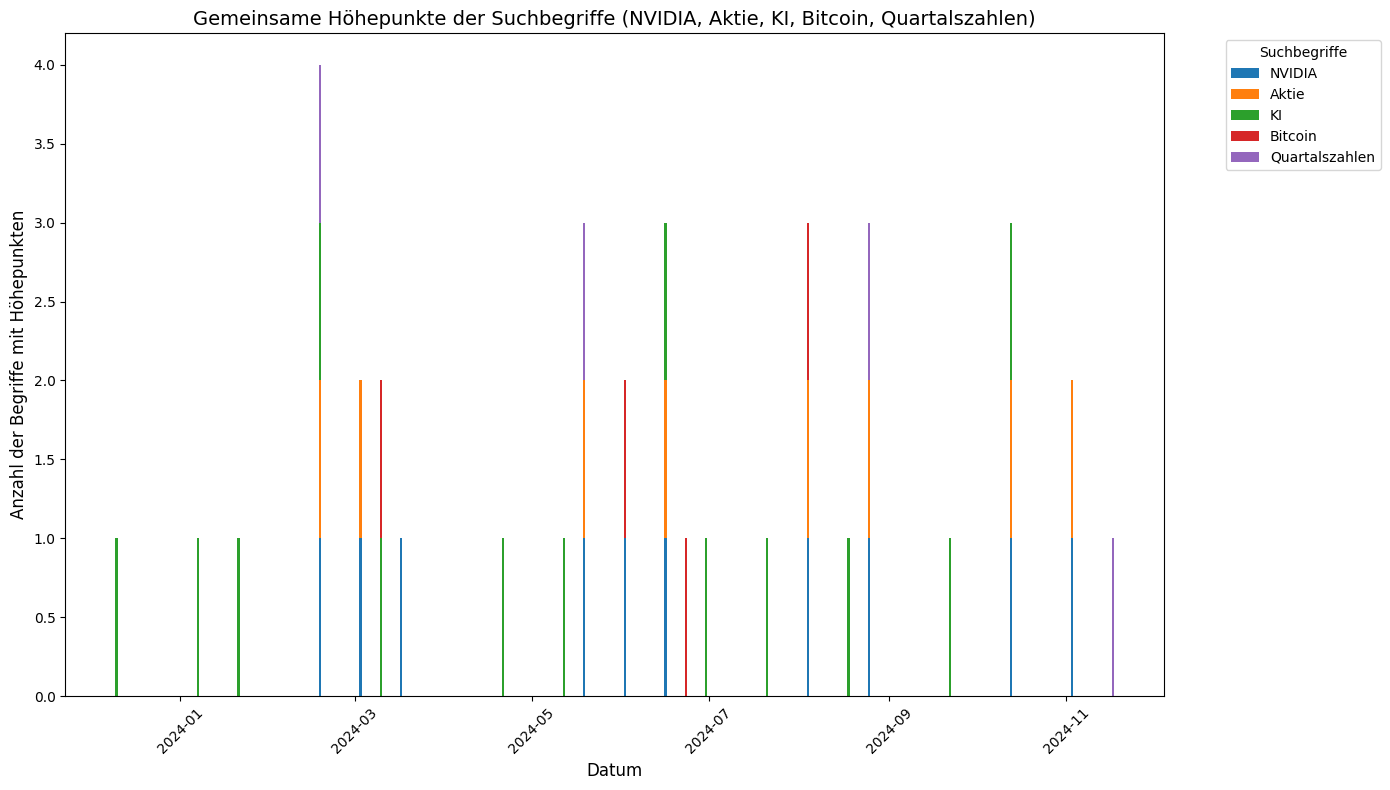

In [50]:
import pandas as pd
from scipy.signal import find_peaks

# Funktion zur Berechnung der Höhepunkte
def calculate_peaks(dataframe, column, threshold=50):
    peaks, _ = find_peaks(dataframe[column], height=threshold)
    return dataframe.index[peaks]

# Berechne Höhepunkte für verschiedene Suchbegriffe
nvidia_peaks = calculate_peaks(df_timeline_NVIDIA, 'Search Volume')
aktie_peaks = calculate_peaks(df_timeline_NV_aktie, 'Search Volume')
ki_peaks = calculate_peaks(df_timeline_KI, 'Search Volume')
bitcoin_peaks = calculate_peaks(df_timeline_bitc, 'Search Volume')
quartal_peaks = calculate_peaks(df_timeline_quart_zahl, 'Search Volume')

# Erstelle eine Tabelle mit den Höhepunkten
all_dates = sorted(set(nvidia_peaks).union(
    aktie_peaks, ki_peaks, bitcoin_peaks, quartal_peaks))

# Tabelle erstellen
data = {
    "Datum": all_dates,
    "NVIDIA": [1 if date in nvidia_peaks else 0 for date in all_dates],
    "Aktie": [1 if date in aktie_peaks else 0 for date in all_dates],
    "KI": [1 if date in ki_peaks else 0 for date in all_dates],
    "Bitcoin": [1 if date in bitcoin_peaks else 0 for date in all_dates],
    "Quartalszahlen": [1 if date in quartal_peaks else 0 for date in all_dates],
}

# In DataFrame umwandeln
peaks_table = pd.DataFrame(data)

# Zeige die Tabelle an
#print(peaks_table)

# Optional: Tabelle als CSV exportieren
output_file = "Gemeinsame_Hoehepunkte.csv"
peaks_table.to_csv(output_file, index=False)
#print(f"Tabelle wurde als {output_file} gespeichert.")

import matplotlib.pyplot as plt

# Transponiere die Tabelle für eine bessere grafische Darstellung
peaks_table_long = peaks_table.set_index("Datum").transpose()

# Erstelle ein gestapeltes Balkendiagramm
plt.figure(figsize=(14, 8))

for idx, row in enumerate(peaks_table_long.index):
    plt.bar(
        peaks_table_long.columns, 
        peaks_table_long.loc[row],  
        label=row, 
        bottom=peaks_table_long.iloc[:idx].sum()  
    )

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Gemeinsame Höhepunkte der Suchbegriffe (NVIDIA, Aktie, KI, Bitcoin, Quartalszahlen)", fontsize=14)
plt.xlabel("Datum", fontsize=12)
plt.ylabel("Anzahl der Begriffe mit Höhepunkten", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Suchbegriffe", bbox_to_anchor=(1.05, 1), loc='upper left')

# Diagramm anzeigen
plt.tight_layout()
plt.show()



### Auswertung: Gemeinsame Höhepunkte der Suchbegriffe

Die Analyse der gemeinsamen Höhepunkte für die Begriffe **NVIDIA**, **Aktie**, **KI**, **Bitcoin** und **Quartalszahlen** zeigt signifikante Zusammenhänge zwischen verschiedenen Ereignissen:

- **Häufigkeit der Höhepunkte:**
  - Insgesamt zeigt sich, dass die Begriffe **NVIDIA** und **Aktie** oft zeitgleich Höhepunkte haben, insbesondere in Verbindung mit finanziellen Ereignissen wie **Quartalszahlen**. 
  - **KI** und **Bitcoin** haben in einigen Fällen spezifische Höhepunkte, die sich nicht direkt mit anderen Begriffen überschneiden.

- **Besondere Höhepunkte:**
  - **18. Februar 2024:** Alle Begriffe außer **Bitcoin** erreichen Höhepunkte. Dies korreliert mit den Spekulationen rund um die Quartalszahlen von NVIDIA.
  - **16. Juni 2024:** Ein Höhepunkt bei **NVIDIA**, **Aktie** und **KI**, möglicherweise beeinflusst durch den Aktienkursanstieg nach dem Aktiensplit sowie gesteigertes öffentliches Interesse nach der Key Note des NVIDIA CEOs im Rahmen der Computex.
  - **4. August 2024:** **Bitcoin**, **NVIDIA** und **Aktie** zeigen gleichzeitig einen Höhepunkt. Dies ist vermutlich auf politische Entwicklungen (z.B. kündigte der US Präsidentschaftskandidat Donald Trump an, die USA zur "Bitcoin-Supermacht" machen zu wollen) und das steigende Interesse an Kryptowährungen zurückzuführen.
  - **25. August 2024:** Ein starker Höhepunkt bei **Quartalszahlen**, **NVIDIA** und **Aktie**, passend zur Veröffentlichung der Quartalszahlen.
  - **13. Oktober 2024:** **NVIDIA**, **Aktie** und **KI** zeigen Höhepunkte. Dies deutet auf erhöhte Aufmerksamkeit für technologische Entwicklungen hin.

- **Isolierte Höhepunkte:**
  - **KI** zeigt einige isolierte Höhepunkte, insbesondere am **21. Januar 2024** und **10. März 2024**, die mit technologischen oder medialen Ereignissen im KI-Bereich zusammenhängen könnten.
  - **Bitcoin** zeigt ebenfalls isolierte Höhepunkte, wie am **23. Juni 2024**, die auf Entwicklungen im Kryptomarkt zurückzuführen sind.

Die Grafik visualisiert diese Beziehungen und verdeutlicht die enge Verflechtung zwischen technologischen, finanziellen und gesellschaftlichen Trends, die das öffentliche Interesse an NVIDIA und verwandten Themen beeinflussen.


### Vergleich der Verschiedenen Themen anhand der Tiefpunkte

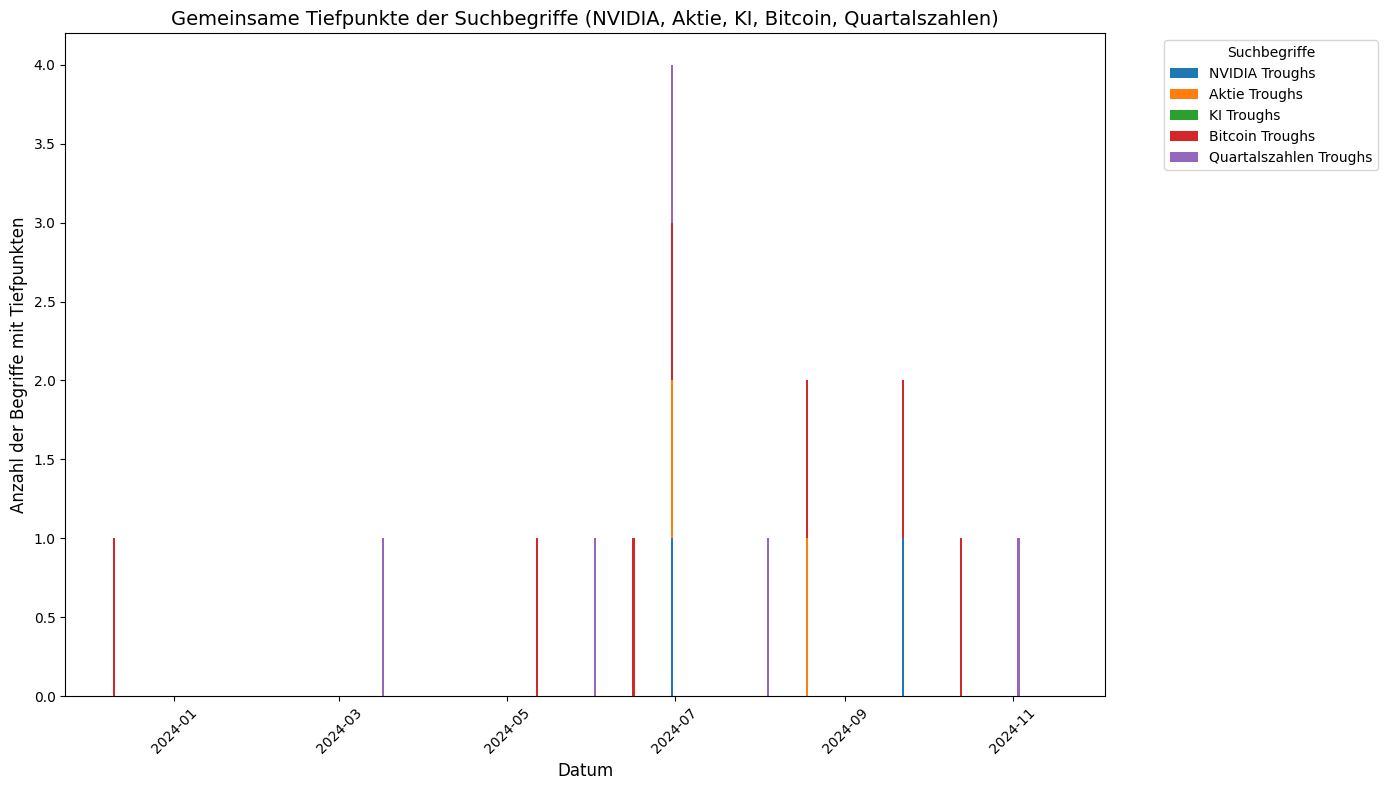

In [51]:

# Funktion zur Berechnung der Tiefpunkte
def calculate_troughs(dataframe, column, threshold=50):
    # Tiefpunkte sind Peaks der invertierten Daten
    inverted_data = -dataframe[column]
    troughs, _ = find_peaks(inverted_data, height=-threshold)
    return dataframe.index[troughs]

# Berechne Tiefpunkte (Troughs) für verschiedene Suchbegriffe
nvidia_troughs = calculate_troughs(df_timeline_NVIDIA, 'Search Volume')
aktie_troughs = calculate_troughs(df_timeline_NV_aktie, 'Search Volume')
ki_troughs = calculate_troughs(df_timeline_KI, 'Search Volume')
bitcoin_troughs = calculate_troughs(df_timeline_bitc, 'Search Volume')
quartal_troughs = calculate_troughs(df_timeline_quart_zahl, 'Search Volume')


# Daten für Tiefpunkte vorbereiten
data = {
    "Datum": all_dates,
    "NVIDIA Troughs": [1 if date in nvidia_troughs else 0 for date in all_dates],
    "Aktie Troughs": [1 if date in aktie_troughs else 0 for date in all_dates],
    "KI Troughs": [1 if date in ki_troughs else 0 for date in all_dates],
    "Bitcoin Troughs": [1 if date in bitcoin_troughs else 0 for date in all_dates],
    "Quartalszahlen Troughs": [1 if date in quartal_troughs else 0 for date in all_dates],
}

# In DataFrame umwandeln
troughs_table = pd.DataFrame(data)

# Zeige die Tabelle an
#print(troughs_table)

# Optional: Tabelle als CSV exportieren
output_file_troughs = "Gemeinsame_Tiefpunkte.csv"
troughs_table.to_csv(output_file_troughs, index=False)
#print(f"Tabelle wurde als {output_file_troughs} gespeichert.")

# Transponiere die Tabelle für eine bessere grafische Darstellung
troughs_table_long = troughs_table.set_index("Datum").transpose()

# Erstelle ein gestapeltes Balkendiagramm für die Tiefpunkte
plt.figure(figsize=(14, 8))

# Jede Zeile der transponierten Tabelle wird als Balken hinzugefügt
for idx, row in enumerate(troughs_table_long.index):
    plt.bar(
        troughs_table_long.columns,  # Die Datumswerte
        troughs_table_long.loc[row],  # Die Werte (1 oder 0) für jeden Begriff
        label=row,  # Label entspricht dem Begriff (z. B. NVIDIA, KI)
        bottom=troughs_table_long.iloc[:idx].sum()  # Stapelung: Summe der vorherigen Zeilen
    )

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Gemeinsame Tiefpunkte der Suchbegriffe (NVIDIA, Aktie, KI, Bitcoin, Quartalszahlen)", fontsize=14)
plt.xlabel("Datum", fontsize=12)
plt.ylabel("Anzahl der Begriffe mit Tiefpunkten", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Suchbegriffe", bbox_to_anchor=(1.05, 1), loc='upper left')

# Diagramm anzeigen
plt.tight_layout()
plt.show()




#### Überblick
Die Tabelle zeigt die gemeinsamen Tiefpunkte (Troughs) für die Suchbegriffe **NVIDIA**, **Aktie**, **KI**, **Bitcoin** und **Quartalszahlen** im Zeitraum von November 2023 bis November 2024. Die Tiefpunkte repräsentieren Zeiträume mit geringem Interesse bzw. niedrigem Suchvolumen für die entsprechenden Begriffe. Die Daten bieten wertvolle Einblicke in die Momente, in denen das öffentliche Interesse abgenommen hat.

#### Wichtige Beobachtungen
1. **Gemeinsame Tiefpunkte:**
   - Mehrere Begriffe weisen Tiefpunkte zu denselben Zeitpunkten auf, z. B.:
     - **2023-12-24:** Tiefpunkte für **Aktie** und **Bitcoin**.
     - **2024-01-28:** Tiefpunkte für **NVIDIA**, **Aktie** und **Bitcoin**.
     - **2024-06-30:** Tiefpunkte für **NVIDIA**, **Aktie** und **Bitcoin**.
     - **2024-08-18:** Tiefpunkte für **Aktie** und **Bitcoin**.
     - **2024-10-27:** Tiefpunkte für **NVIDIA** und **Aktie**.

2. **Individuelle Tiefpunkte:**
   - **Quartalszahlen:** Tiefpunkte treten in Zeiträumen zwischen den Veröffentlichungsdaten auf, z. B.:
     - **2024-03-17:** Nach den Februar-Veröffentlichungen und vor den Mai-Veröffentlichungen.
     - **2024-06-30:** Nach den Mai-Veröffentlichungen und vor den August-Veröffentlichungen.
   - **KI:** Tiefpunkte sind seltener und treten oft isoliert auf (z. B. **2024-07-28**).

3. **Bitcoin-Tiefpunkte:**
   - Bitcoin weist Tiefpunkte in Zeiten geringer Marktbewegungen auf, z. B. **2024-01-14**, **2024-04-07** und **2024-09-29**.

4. **NVIDIA-Aktie:**
   - Tiefpunkte treten nach Quartalszahlen oder während längerer ruhiger Marktphasen auf, z. B. **2024-01-28**, **2024-06-30** und **2024-10-27**.

#### Interpretation
- **Weihnachts- und Sommerzeiten (z. B. Dezember und Juli):**
  - Das allgemeine Interesse sinkt in diesen Zeiträumen, was sich durch Feiertage, Urlaubszeiten oder eine geringere Anzahl an Unternehmensankündigungen erklären lässt.
  
- **Zwischen Quartalszahlen:**
  - Das Interesse an NVIDIA und den Quartalszahlen sinkt in den Zeiträumen zwischen den Berichtsveröffentlichungen, was typisch für die Aufmerksamkeitsspanne rund um Finanzdaten ist.

- **Marktstabilität:**
  - Tiefpunkte bei **Bitcoin** korrelieren mit Perioden stabiler Preise ohne große politische oder wirtschaftliche Ereignisse.

#### Zusammenfassung
Die Tiefpunkte in den Suchvolumen-Daten spiegeln eine Abnahme des öffentlichen Interesses wider, die mit ruhigen Markt- und Technologiephasen, saisonalen Einflüssen (z. B. Sommer und Weihnachten) sowie dem Fehlen bedeuten


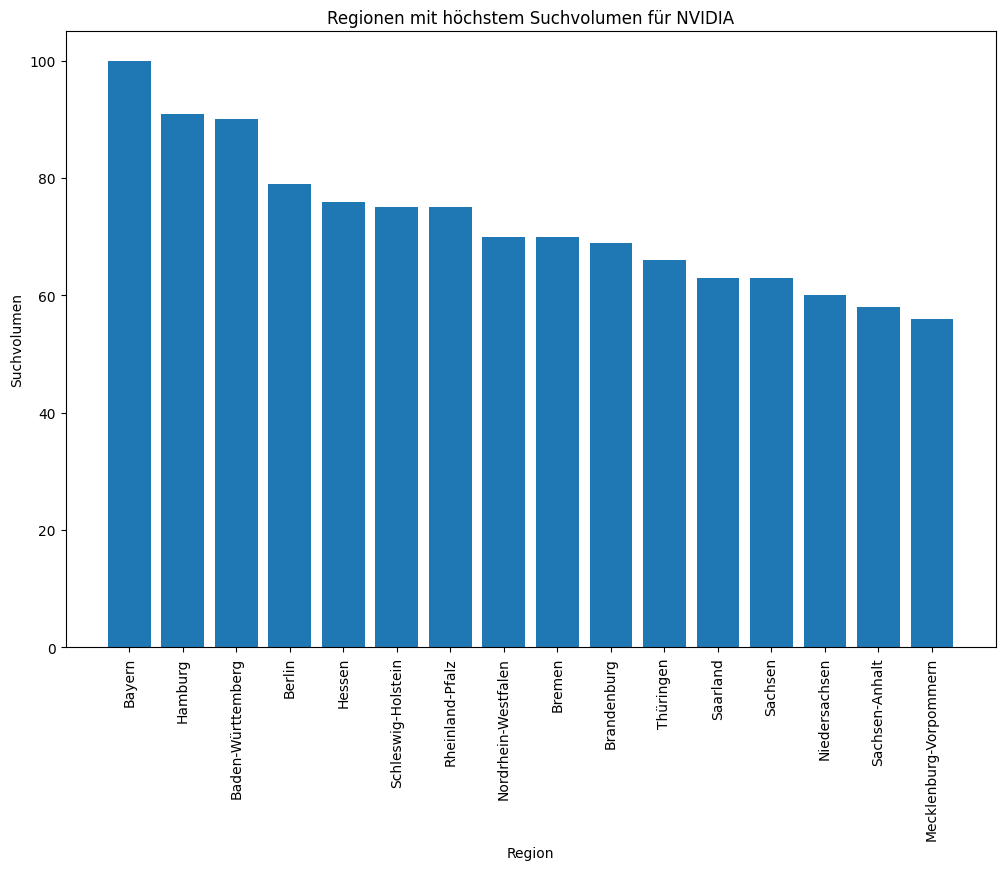

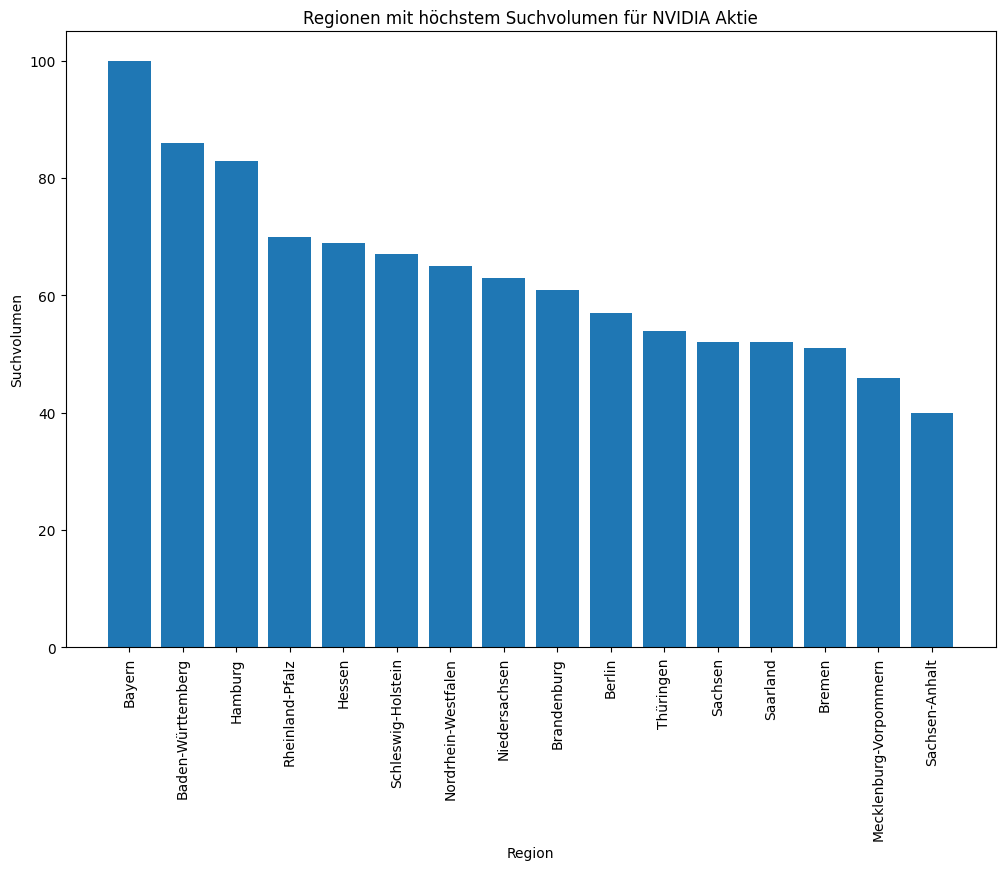

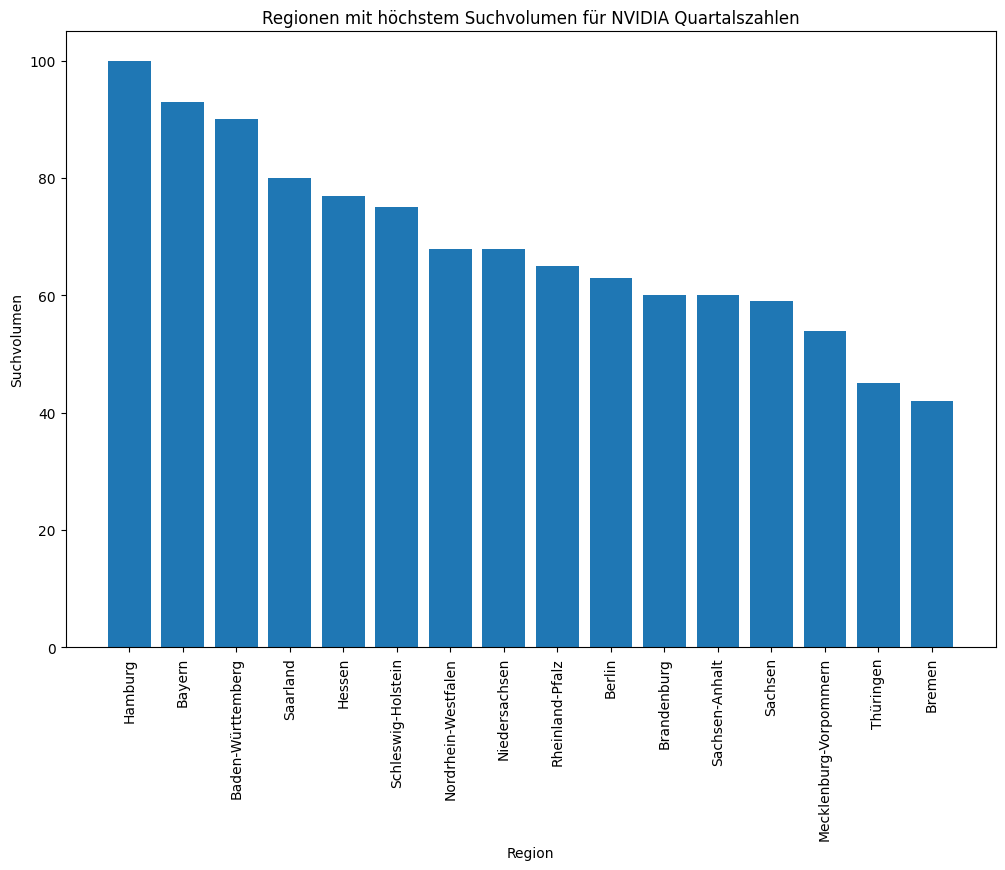

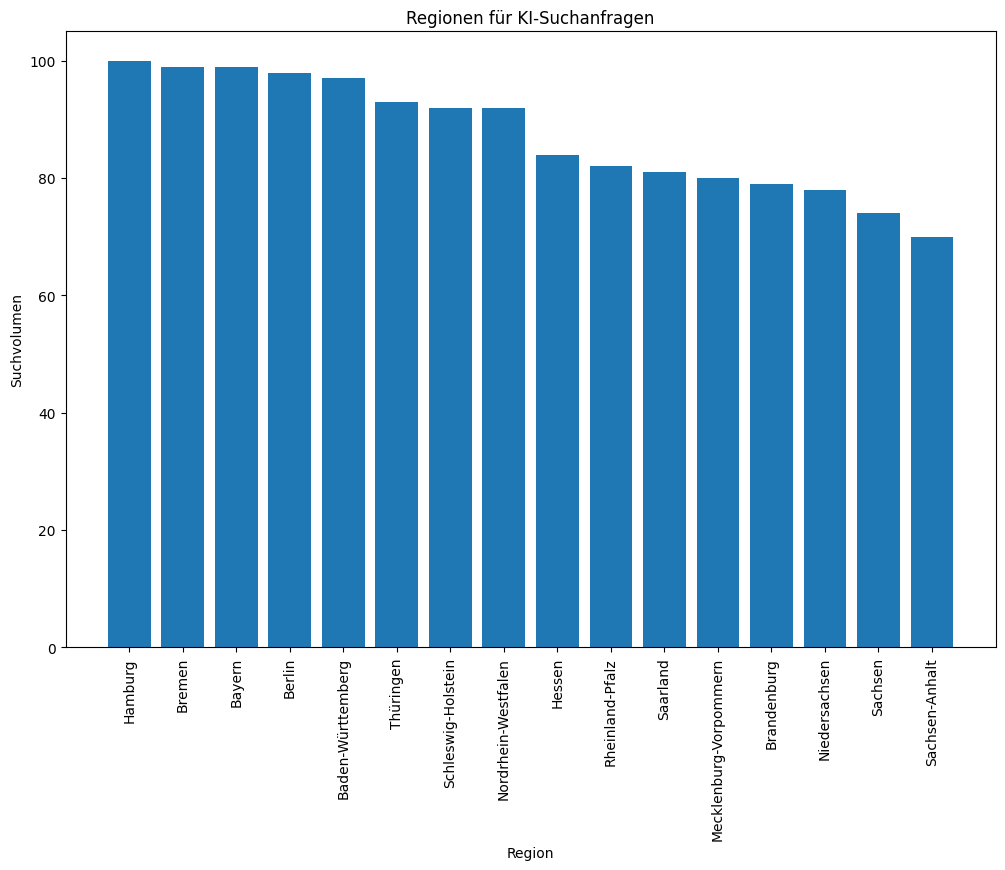

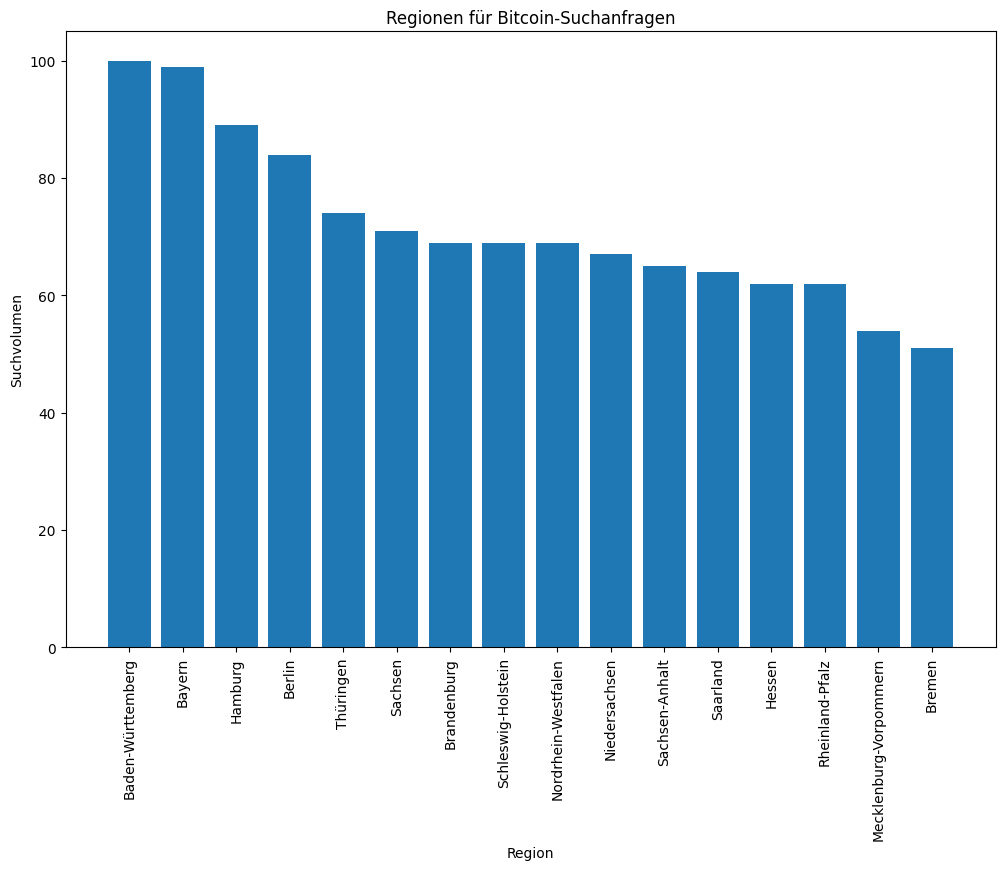

In [53]:
plot_top_regions(df_geo_NVIDIA, title='Regionen mit höchstem Suchvolumen für NVIDIA', xlabel='Region', ylabel='Suchvolumen')
plot_top_regions(df_geo_NV_aktie, title='Regionen mit höchstem Suchvolumen für NVIDIA Aktie', xlabel='Region', ylabel='Suchvolumen')
plot_top_regions(df_geo_quart_zahl, title='Regionen mit höchstem Suchvolumen für NVIDIA Quartalszahlen', xlabel='Region', ylabel='Suchvolumen')
plot_top_regions(df_geo_KI, title='Regionen für KI-Suchanfragen', xlabel='Region', ylabel='Suchvolumen')
plot_top_regions(df_geo_bitc, title='Regionen für Bitcoin-Suchanfragen', xlabel='Region', ylabel='Suchvolumen')

                   NVIDIA  Aktie  Quartalszahlen   KI  Bitcoin
Region                                                        
Bayern                100    100              93   99       99
Hamburg                91     83             100  100       89
Baden-Württemberg      90     86              90   97      100
Berlin                 79     57              63   98       84
Hessen                 76     69              77   84       62
                        NVIDIA  Aktie  Quartalszahlen   KI  Bitcoin  Cluster
Region                                                                      
Bayern                     100    100              93   99       99        2
Hamburg                     91     83             100  100       89        2
Baden-Württemberg           90     86              90   97      100        2
Berlin                      79     57              63   98       84        0
Hessen                      76     69              77   84       62        0
Schleswig-Holstein  

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


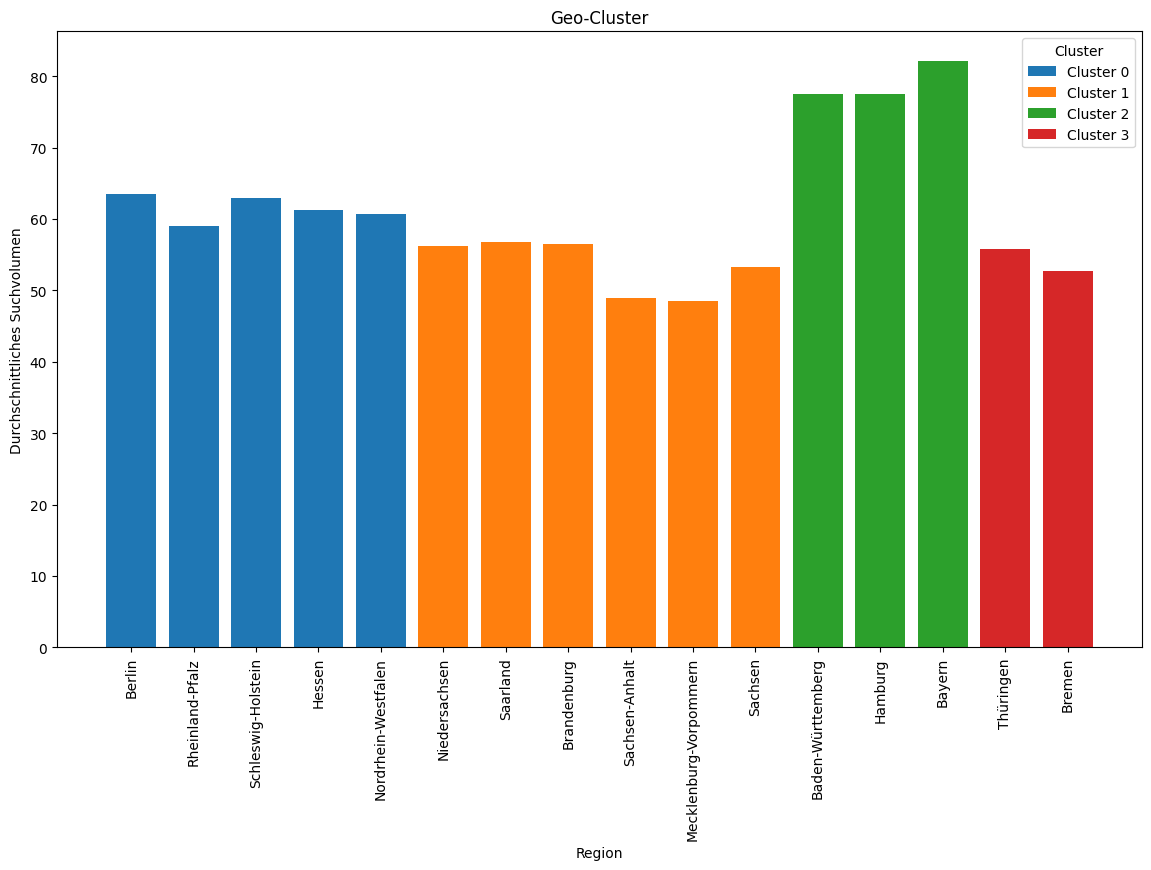

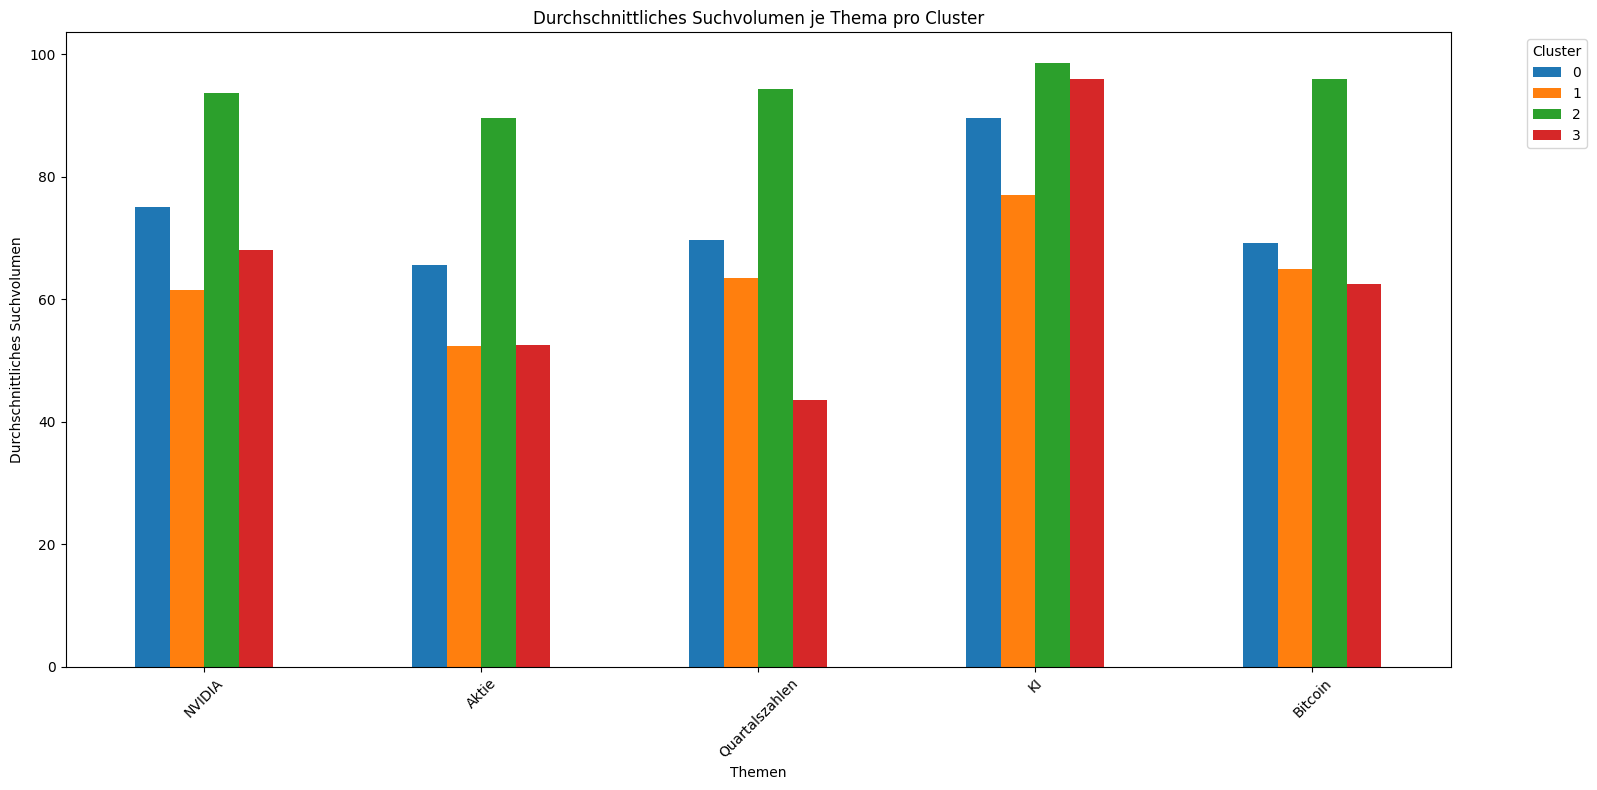

In [54]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Kombiniere die relevanten Geo-Daten
geo_data = {
    'NVIDIA': df_geo_NVIDIA.set_index('Region')['Search Volume'],
    'Aktie': df_geo_NV_aktie.set_index('Region')['Search Volume'],
    'Quartalszahlen': df_geo_quart_zahl.set_index('Region')['Search Volume'],
    'KI': df_geo_KI.set_index('Region')['Search Volume'],
    'Bitcoin': df_geo_bitc.set_index('Region')['Search Volume'],
}

# Kombiniere die Daten in einen DataFrame
geo_combined = pd.concat(geo_data.values(), axis=1)
geo_combined.columns = geo_data.keys()
geo_combined = geo_combined.fillna(0)  # Fehlende Werte mit 0 auffüllen

# Überprüfe die Daten
print(geo_combined.head())

# Standardisiere die Daten
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo_combined)

# Anzahl der Cluster definieren
n_clusters = 4  # Diese Zahl kannst du anpassen

# Führe K-Means durch
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
geo_combined['Cluster'] = kmeans.fit_predict(geo_scaled)

# Zeige die Cluster-Zuweisungen
print(geo_combined)

# Sortiere die Daten nach Cluster
geo_combined_sorted = geo_combined.sort_values('Cluster')

# Visualisiere die durchschnittlichen Werte pro Cluster
plt.figure(figsize=(14, 8))
for cluster in range(n_clusters):
    cluster_data = geo_combined_sorted[geo_combined_sorted['Cluster'] == cluster]
    plt.bar(cluster_data.index, cluster_data.mean(axis=1), label=f'Cluster {cluster}')

plt.title('Geo-Cluster')
plt.xlabel('Region')
plt.ylabel('Durchschnittliches Suchvolumen')
plt.xticks(rotation=90)
plt.legend(title="Cluster")
plt.show()

# Durchschnittliches Suchvolumen je Thema pro Cluster berechnen
cluster_theme_avg = geo_combined.groupby('Cluster').mean()

# Visualisiere die Themen-Verteilung je Cluster
cluster_theme_avg.T.plot(kind='bar', figsize=(16, 8))
plt.title('Durchschnittliches Suchvolumen je Thema pro Cluster')
plt.xlabel('Themen')
plt.ylabel('Durchschnittliches Suchvolumen')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


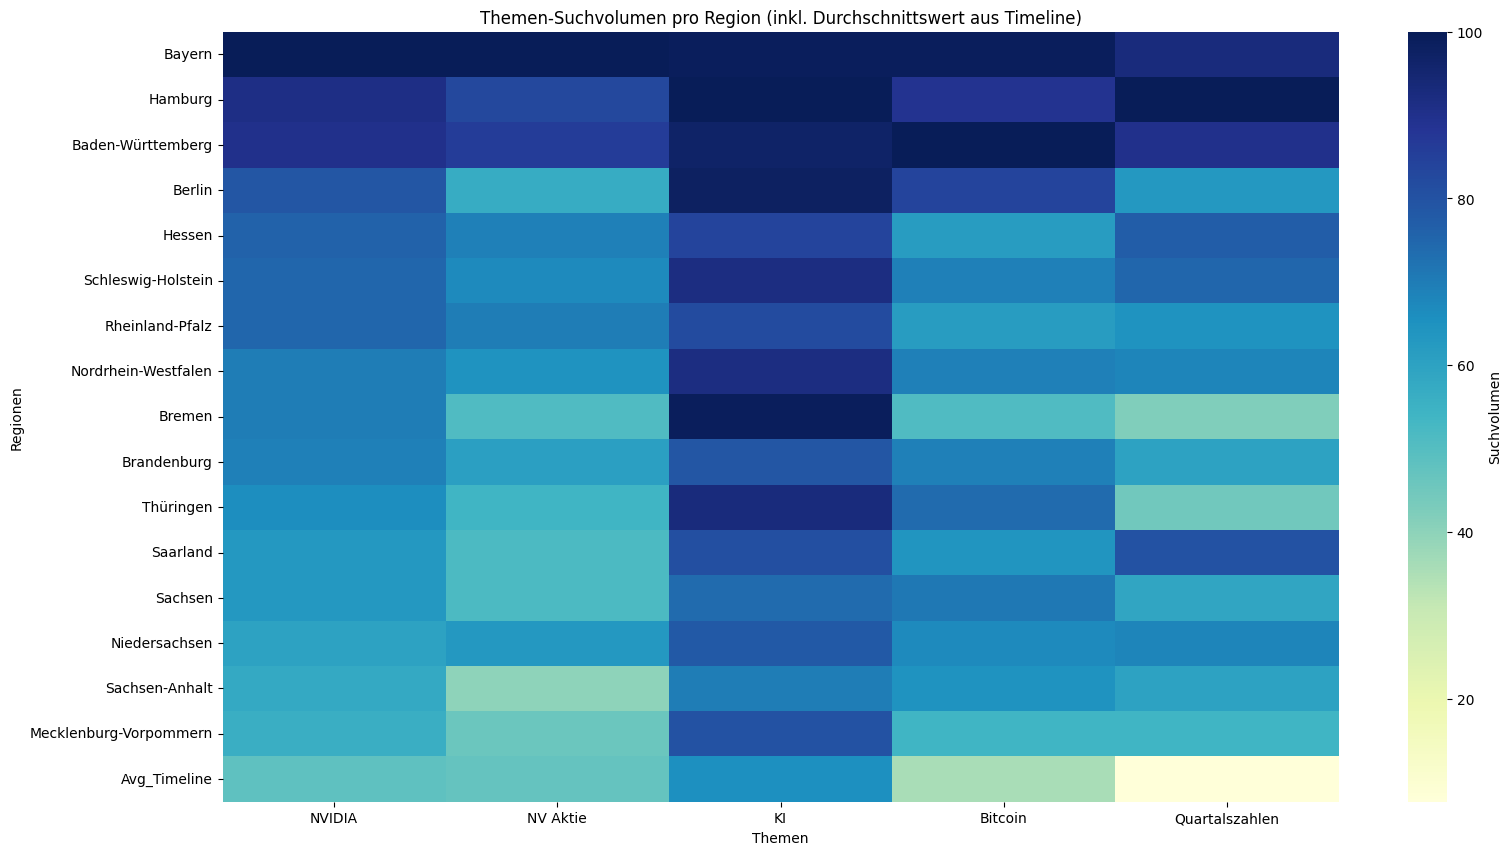

In [55]:
# Berechnung des durchschnittlichen Suchvolumens für Timeline-Daten
df_timeline_NVIDIA_avg = df_timeline_NVIDIA['Search Volume'].mean()
df_timeline_NV_aktie_avg = df_timeline_NV_aktie['Search Volume'].mean()
df_timeline_KI_avg = df_timeline_KI['Search Volume'].mean()
df_timeline_bitc_avg = df_timeline_bitc['Search Volume'].mean()
df_timeline_quart_zahl_avg = df_timeline_quart_zahl['Search Volume'].mean()

# Kombiniere Geo-Daten
geo_combined = pd.concat([
    df_geo_NVIDIA.set_index('Region')['Search Volume'],
    df_geo_NV_aktie.set_index('Region')['Search Volume'],
    df_geo_KI.set_index('Region')['Search Volume'],
    df_geo_bitc.set_index('Region')['Search Volume'],
    df_geo_quart_zahl.set_index('Region')['Search Volume']
], axis=1)

# Benenne die Spalten entsprechend der Themen
geo_combined.columns = ['NVIDIA', 'NV Aktie', 'KI', 'Bitcoin', 'Quartalszahlen']

# Fülle fehlende Werte mit 0
geo_combined.fillna(0, inplace=True)

# Füge die Timeline-Durchschnittswerte als zusätzliche Zeile hinzu
geo_combined.loc['Avg_Timeline'] = [
    df_timeline_NVIDIA_avg,
    df_timeline_NV_aktie_avg,
    df_timeline_KI_avg,
    df_timeline_bitc_avg,
    df_timeline_quart_zahl_avg
]

import seaborn as sns
import matplotlib.pyplot as plt

# Erstelle die Heatmap für Themen vs. Regionen
plt.figure(figsize=(18, 10))
sns.heatmap(
    geo_combined, 
    cmap="YlGnBu", 
    annot=False, 
    xticklabels=True, 
    yticklabels=True,
    cbar_kws={'label': 'Suchvolumen'}
)
plt.title('Themen-Suchvolumen pro Region (inkl. Durchschnittswert aus Timeline)')
plt.xlabel('Themen')
plt.ylabel('Regionen')
plt.show()



In [56]:
#Import Geo Daten

df_geo_NVIDIA = load_and_prepare_geo_data('geoMap.csv')
df_geo_NV_aktie = load_and_prepare_geo_data('geoMap_NV_aktie.csv')
df_geo_KI = load_and_prepare_geo_data('geoMap_KI.csv')
df_geo_geforce = load_and_prepare_geo_data('geoMap_geforce.csv')
df_geo_h100 = load_and_prepare_geo_data('geoMap_h100.csv')
df_geo_bitc = load_and_prepare_geo_data('geoMap_bitc.csv')
df_geo_amd_gpu = load_and_prepare_geo_data('geoMap_amd_gpu.csv')
df_geo_autonom_fahren = load_and_prepare_geo_data('geoMap_autonom_fahren.csv')
df_geo_btc_mining = load_and_prepare_geo_data('geoMap_btc_mining.csv')
df_geo_chat_gpt = load_and_prepare_geo_data('geoMap_chat_gpt.csv')
df_geo_claude = load_and_prepare_geo_data('geoMap_claude.csv')
df_geo_cloud_comp = load_and_prepare_geo_data('geoMap_cloud_comp.csv')
df_geo_deep_lea = load_and_prepare_geo_data('geoMap_deep_lea.csv')
df_geo_energieverbrauch_ki = load_and_prepare_geo_data('geoMap_energieverbauch_ki.csv')
df_geo_ethereum_mining = load_and_prepare_geo_data('geoMap_ethereum_mining.csv')
df_geo_gemini = load_and_prepare_geo_data('geoMap_gemini.csv')
df_geo_google_ai = load_and_prepare_geo_data('geoMap_google_ai.csv')
df_geo_gpus = load_and_prepare_geo_data('geoMap_gpus.csv')
df_geo_green_computing = load_and_prepare_geo_data('geoMap_green_computing.csv')
df_geo_hpc = load_and_prepare_geo_data('geoMap_hpc.csv')
df_geo_NV_drive = load_and_prepare_geo_data('geoMap_NV_drive.csv')
df_geo_NV_gpu = load_and_prepare_geo_data('geoMap_NV_gpu.csv')
df_geo_NV_omniverse = load_and_prepare_geo_data('geoMap_NV_omniverse.csv')
df_geo_Pc_gaming = load_and_prepare_geo_data('geoMap_Pc_gaming.csv')
df_geo_Ray_tracing = load_and_prepare_geo_data('geoMap_Ray_tracing.csv')
df_geo_rz = load_and_prepare_geo_data('geoMap_rz.csv')
df_geo_tsmc = load_and_prepare_geo_data('geoMap_tsmc.csv')
df_geo_VR = load_and_prepare_geo_data('geoMap_VR.csv')

In [57]:
#Import Timeline Daten

df_timeline_NVIDIA = load_and_prepare_timeline_data('multiTimeline.csv')
df_timeline_NV_aktie = load_and_prepare_timeline_data('multiTimeline_NV_aktie.csv')
df_timeline_KI = load_and_prepare_timeline_data('multiTimeline_KI.csv')
df_timeline_geforce = load_and_prepare_timeline_data('multiTimeline_geforce.csv')
df_timeline_h100 = load_and_prepare_timeline_data('multiTimeline_h100.csv')
df_timeline_bitc = load_and_prepare_timeline_data('multiTimeline_bitc.csv')
df_timeline_amd_gpu = load_and_prepare_timeline_data('multiTimeline_amd_gpu.csv')
df_timeline_autonom_fahren = load_and_prepare_timeline_data('multiTimeline_autonom_fahren.csv')
df_timeline_btc_mining = load_and_prepare_timeline_data('multiTimeline_btc_mining.csv')
df_timeline_chat_gpt = load_and_prepare_timeline_data('multiTimeline_chat_gpt.csv')
df_timeline_claude = load_and_prepare_timeline_data('multiTimeline_claude.csv')
df_timeline_cloud_comp = load_and_prepare_timeline_data('multiTimeline_cloud_comp.csv')
df_timeline_deep_lea = load_and_prepare_timeline_data('multiTimeline_deep_lea.csv')
df_timeline_energieverbrauch_ki = load_and_prepare_timeline_data('multiTimeline_energieverbrauch_ki.csv')
df_timeline_gemini = load_and_prepare_timeline_data('multiTimeline_gemini.csv')
df_timeline_google_ai = load_and_prepare_timeline_data('multiTimeline_google_ai.csv')
df_timeline_gpus = load_and_prepare_timeline_data('multiTimeline_gpus.csv')
df_timeline_green_computing = load_and_prepare_timeline_data('multiTimeline_green_computing.csv')
df_timeline_hpc = load_and_prepare_timeline_data('multiTimeline_hpc.csv')
df_timeline_NV_drive = load_and_prepare_timeline_data('multiTimeline_NV_drive.csv')
df_timeline_NV_gpu = load_and_prepare_timeline_data('multiTimeline_NV_gpu.csv')
df_timeline_NV_omniverse = load_and_prepare_timeline_data('multiTimeline_NV_omniverse.csv')
df_timeline_Pc_gaming = load_and_prepare_timeline_data('multiTimeline_Pc_gaming.csv')
df_timeline_Ray_tracing = load_and_prepare_timeline_data('multiTimeline_Ray_tracing.csv')
df_timeline_rz = load_and_prepare_timeline_data('multiTimeline_rz.csv')
df_timeline_tsmc = load_and_prepare_timeline_data('multiTimeline_tsmc.csv')
df_timeline_VR = load_and_prepare_timeline_data('multiTimeline_VR.csv')

In [58]:
# Funktion zur automatisierten Visualisierung aller Zeitreihendaten
def visualize_timeline_data(timeline_data):
    for name, df in timeline_data.items():
        print(f"Erstelle Zeitreihen-Grafiken für: {name}")
        # Zeitreihenplot
        plot_time_series(df, title=f'Zeitliche Entwicklung des Suchvolumens: {name}', label='Suchvolumen')
        # Gleitender Durchschnitt
        plot_rolling_average(df, title=f'Gleitender Durchschnitt des Suchvolumens: {name}', label='Wöchentliches Suchvolumen')

# Funktion zur automatisierten Visualisierung aller Geo-Daten
def visualize_geo_data(geo_data):
    for name, df in geo_data.items():
        print(f"Erstelle Geo-Grafiken für: {name}")
        # Geo-Plot
        plot_top_regions(df, title=f'Regionen mit höchstem Suchvolumen: {name}', xlabel='Region', ylabel='Suchvolumen')

# Dictionaries mit allen Zeitreihen- und Geo-Daten
timeline_data = {
    "NVIDIA": df_timeline_NVIDIA,
    "NV Aktie": df_timeline_NV_aktie,
    "KI": df_timeline_KI,
    "GeForce": df_timeline_geforce,
    "H100": df_timeline_h100,
    "Bitcoin": df_timeline_bitc,
    "AMD GPU": df_timeline_amd_gpu,
    "Autonomes Fahren": df_timeline_autonom_fahren,
    "BTC Mining": df_timeline_btc_mining,
    "ChatGPT": df_timeline_chat_gpt,
    "Claude": df_timeline_claude,
    "Cloud Computing": df_timeline_cloud_comp,
    "Deep Learning": df_timeline_deep_lea,
    "Energieverbrauch KI": df_timeline_energieverbrauch_ki,
    "Gemini": df_timeline_gemini,
    "Google AI": df_timeline_google_ai,
    "GPUs": df_timeline_gpus,
    "Green Computing": df_timeline_green_computing,
    "HPC": df_timeline_hpc,
    "NVIDIA Drive": df_timeline_NV_drive,
    "NVIDIA GPU": df_timeline_NV_gpu,
    "NVIDIA Omniverse": df_timeline_NV_omniverse,
    "PC Gaming": df_timeline_Pc_gaming,
    "Ray Tracing": df_timeline_Ray_tracing,
    "Rechenzentren": df_timeline_rz,
    "TSMC": df_timeline_tsmc,
    "Virtual Reality": df_timeline_VR
}

geo_data = {
    "NVIDIA": df_geo_NVIDIA,
    "NV Aktie": df_geo_NV_aktie,
    "KI": df_geo_KI,
    "GeForce": df_geo_geforce,
    "H100": df_geo_h100,
    "Bitcoin": df_geo_bitc,
    "AMD GPU": df_geo_amd_gpu,
    "Autonomes Fahren": df_geo_autonom_fahren,
    "BTC Mining": df_geo_btc_mining,
    "ChatGPT": df_geo_chat_gpt,
    "Claude": df_geo_claude,
    "Cloud Computing": df_geo_cloud_comp,
    "Deep Learning": df_geo_deep_lea,
    "Energieverbrauch KI": df_geo_energieverbrauch_ki,
    "Ethereum Mining": df_geo_ethereum_mining,
    "Gemini": df_geo_gemini,
    "Google AI": df_geo_google_ai,
    "GPUs": df_geo_gpus,
    "Green Computing": df_geo_green_computing,
    "HPC": df_geo_hpc,
    "NVIDIA Drive": df_geo_NV_drive,
    "NVIDIA GPU": df_geo_NV_gpu,
    "NVIDIA Omniverse": df_geo_NV_omniverse,
    "PC Gaming": df_geo_Pc_gaming,
    "Ray Tracing": df_geo_Ray_tracing,
    "Rechenzentren": df_geo_rz,
    "TSMC": df_geo_tsmc,
    "Virtual Reality": df_geo_VR
}


NVIDIA - Statistiken:
       Search Volume
count      53.000000
mean       48.283019
std        17.542670
min        22.000000
25%        36.000000
50%        47.000000
75%        54.000000
max       100.000000
NV Aktie - Statistiken:
       Search Volume
count      53.000000
mean       47.150943
std        23.082124
min        13.000000
25%        27.000000
50%        45.000000
75%        55.000000
max       100.000000
KI - Statistiken:
       Search Volume
count      53.000000
mean       65.603774
std        12.518202
min        42.000000
25%        57.000000
50%        62.000000
75%        73.000000
max       100.000000
GeForce - Statistiken:
       Search Volume
count      53.000000
mean       67.603774
std        10.833246
min        50.000000
25%        60.000000
50%        67.000000
75%        74.000000
max       100.000000
H100 - Statistiken:
       Search Volume
count      53.000000
mean       45.113208
std        22.846192
min         0.000000
25%        34.000000
50%        

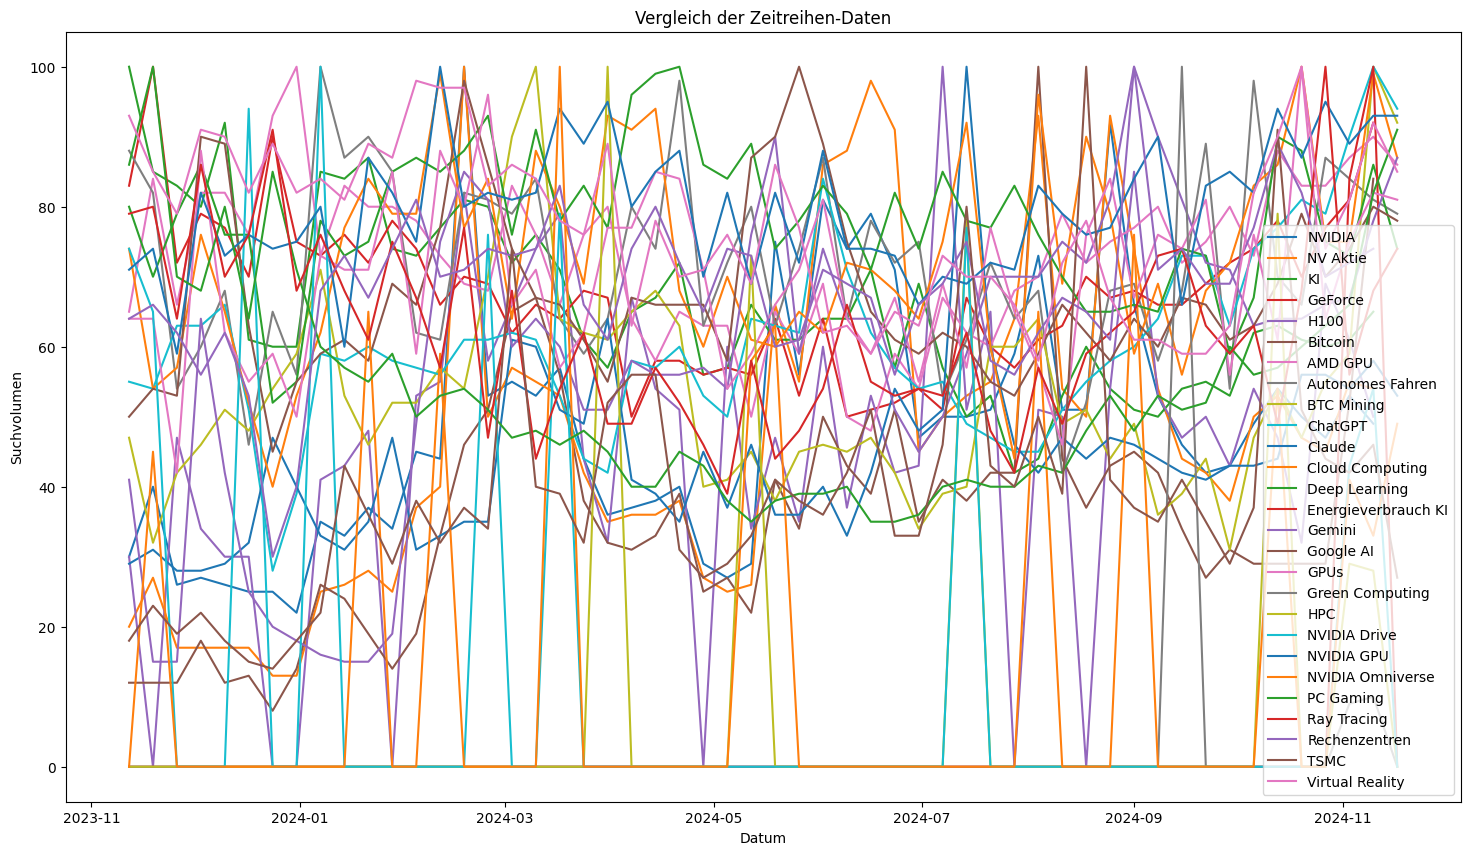

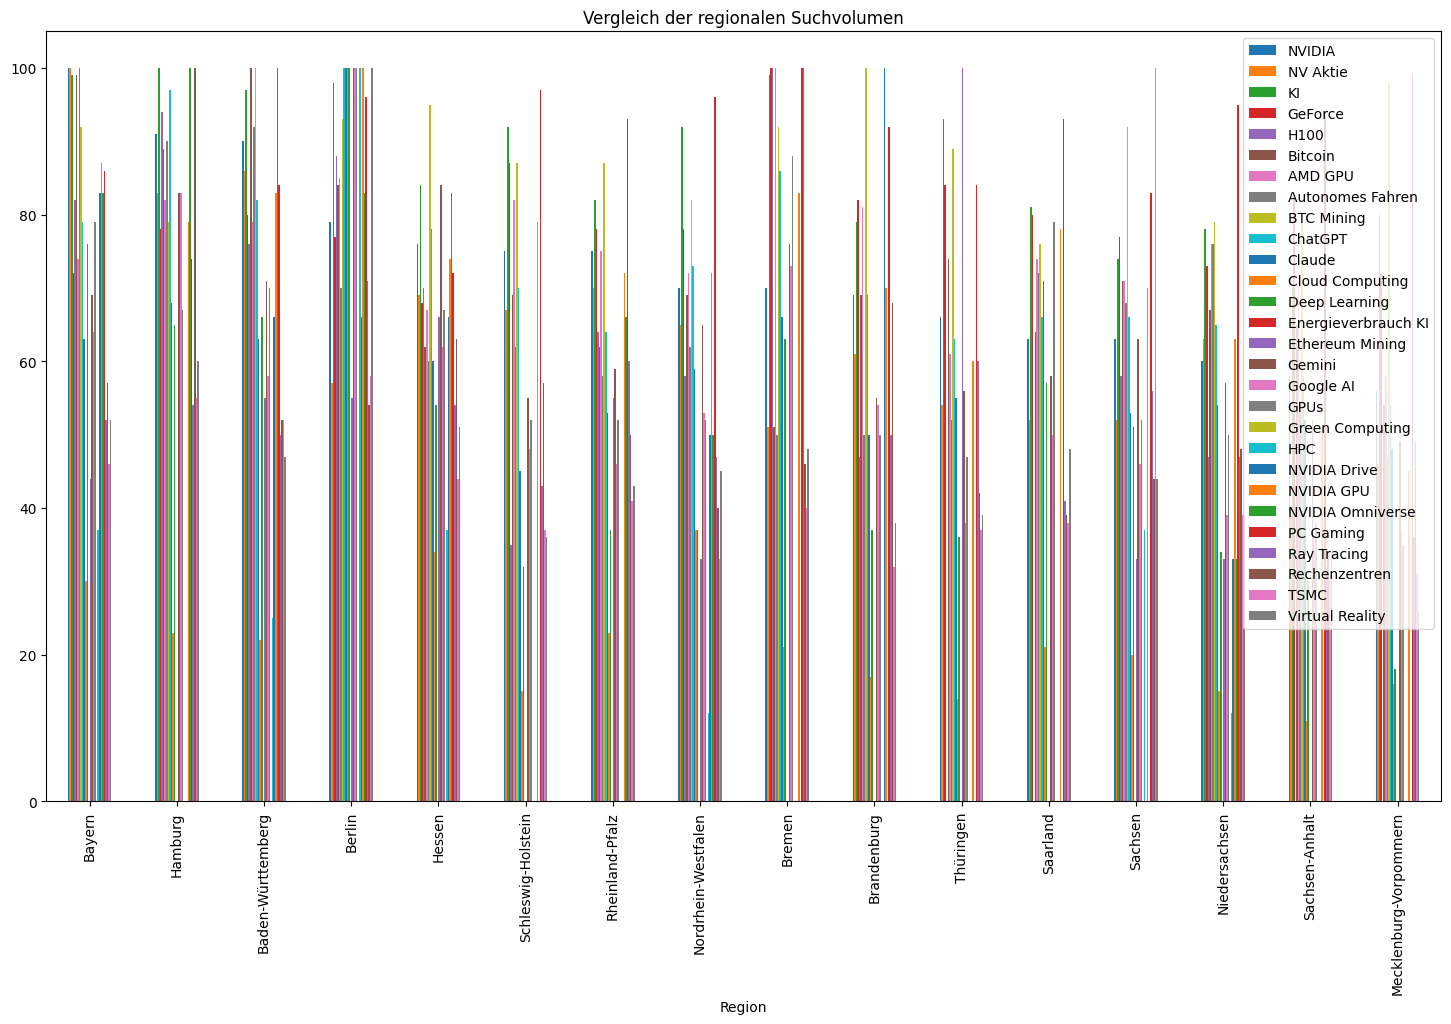

In [59]:
# Überblick
for name, df in timeline_data.items():
    print(f"{name} - Statistiken:")
    print(df.describe())
    
## Alle Zeitreihen zusammen
plt.figure(figsize=(18, 10))
for name, df in timeline_data.items():
    plt.plot(df.index, df['Search Volume'], label=name)
plt.legend()
plt.title('Vergleich der Zeitreihen-Daten')
plt.xlabel('Datum')
plt.ylabel('Suchvolumen')
plt.show()

## Heatmap der Themen
geo_combined = pd.concat([df.set_index('Region')['Search Volume'] for df in geo_data.values()], axis=1)
geo_combined.columns = geo_data.keys()
geo_combined.plot(kind='bar', figsize=(18, 10), title='Vergleich der regionalen Suchvolumen')
plt.xticks(rotation=90)
plt.show()

                       NVIDIA  NV Aktie        KI   GeForce      H100  \
NVIDIA               1.000000  0.969642 -0.275853 -0.308841  0.420969   
NV Aktie             0.969642  1.000000 -0.373028 -0.409898  0.423684   
KI                  -0.275853 -0.373028  1.000000  0.375316 -0.028485   
GeForce             -0.308841 -0.409898  0.375316  1.000000 -0.309841   
H100                 0.420969  0.423684 -0.028485 -0.309841  1.000000   
Bitcoin              0.624916  0.703184 -0.361055 -0.278157  0.474136   
AMD GPU             -0.282452 -0.348175  0.048434  0.756459 -0.202953   
Autonomes Fahren     0.057267  0.042409  0.419183  0.149624  0.159155   
BTC Mining           0.004065  0.042626  0.153230  0.105661  0.208812   
ChatGPT              0.237470  0.228685  0.105590  0.174024  0.302982   
Claude               0.162096  0.235562 -0.496003 -0.109725  0.174916   
Cloud Computing      0.151270  0.178779  0.083534 -0.002860  0.316846   
Deep Learning       -0.010546  0.011369  0.254739 -

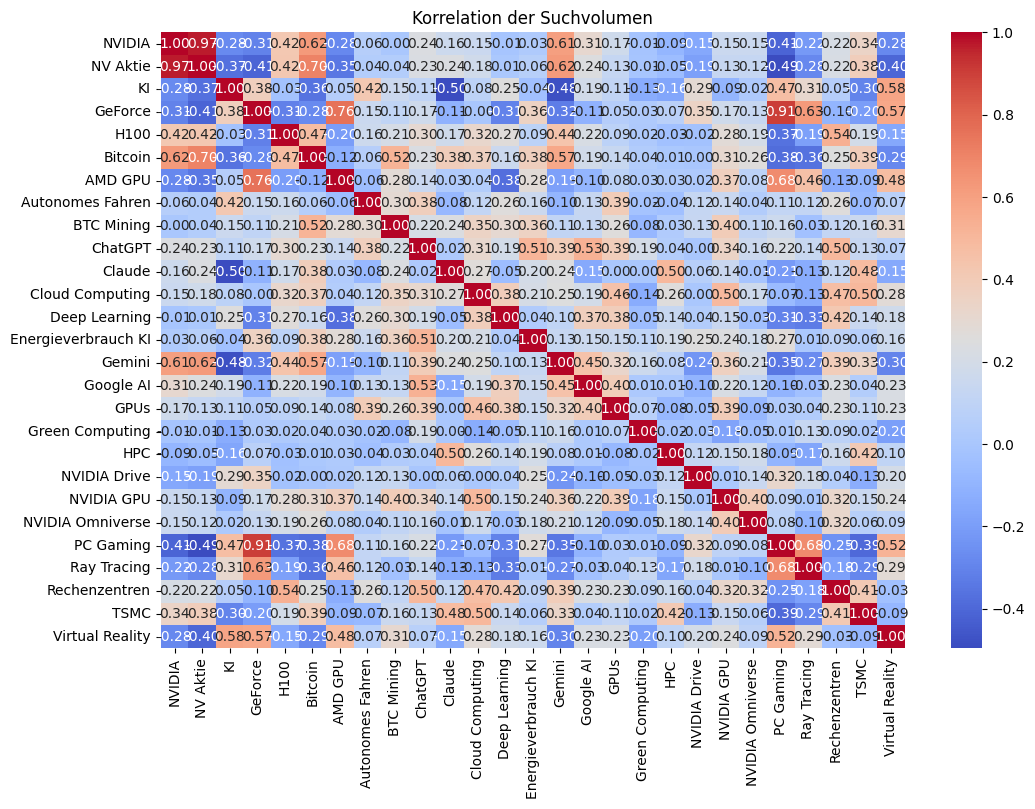

                            NVIDIA  NV Aktie  KI  GeForce  H100  Bitcoin  \
Week                                                                       
2024-11-17 PC Gaming           NaN       NaN NaN      NaN   NaN      NaN   
           Ray Tracing         NaN       NaN NaN      NaN   NaN      NaN   
           Rechenzentren       NaN       NaN NaN      NaN   NaN      NaN   
           TSMC                NaN       NaN NaN      NaN   NaN      NaN   
           Virtual Reality     NaN       NaN NaN      NaN   NaN      NaN   

                             AMD GPU  Autonomes Fahren  BTC Mining   ChatGPT  \
Week                                                                           
2024-11-17 PC Gaming        0.469565         -0.964641    0.911173  0.750577   
           Ray Tracing     -0.752221          0.505053   -0.302893 -0.704988   
           Rechenzentren         NaN               NaN         NaN       NaN   
           TSMC             0.193441          0.635438   -0.306426 

In [60]:
# Korrelation der Timeline Daten

combined_timeline = pd.concat([df['Search Volume'].rename(name) for name, df in timeline_data.items()], axis=1)
corr_matrix = combined_timeline.corr()
print(corr_matrix)

# Visualisierung der Korrelationen
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelation der Suchvolumen")
plt.show()

# Dynamische Korrelation

rolling_corr = combined_timeline.rolling(window=4).corr()
print(rolling_corr.tail())